In [138]:
import pandas as pd
import numpy as np
import random
import math


In [139]:
def generate_num_target_dataset(a=5, b=20, dataset_length=10000):
    return pd.DataFrame(np.random.uniform(a, b, size=dataset_length), columns=['target'])


In [140]:
def linear_dep(row, scale=1, noise=0.2, offset=0,):
    return row['target'] * scale * (1 + math.copysign(noise, random.random() - 0.5)) + offset
    # return row['target'] * scale * (1 + (noise * random.random() - 0.5)) + offset


def build_linear_dep(noise=None, scale=None,  offset=None):
    _noise = random.uniform(0.1, 0.3) if noise == None else noise
    _scale = random.uniform(0.1, 10) if scale == None else scale
    _offset = random.uniform(0, 10 * _scale) if offset == None else offset
    label = f"lin_dep_noise_{_noise:.3f}_scale_{_scale:.3f}_offset_{_offset:.3f}"
    print(label)
    return lambda row: linear_dep(row, _scale, _noise, _offset)


In [141]:
_scale = 10.364574574
_noise = 4.4564564
_offset = 12.34567
f"lin_dep_scale_{_scale:.3f}_noise_{_noise:.3f}_offset_{_offset:.3f}"

'lin_dep_scale_10.365_noise_4.456_offset_12.346'

In [142]:
def non_linear_dep(row, scale=1, noise=0, offset=0, shift=0):
    return scale * math.cos(row['target'] * math.pi / 2 * (1 + shift + noise * (random.random() - 0.5))) + offset


def build_non_linear_dep(scale=None, noise=None,  offset=None, shift=None):
    _scale = random.uniform(1, 100) if scale == None else scale
    _noise = random.uniform(0.05, 0.1) if noise == None else noise
    _offset = random.uniform(0, 20) if offset == None else offset
    _shift = random.uniform(0, 1) if shift == None else shift
    return lambda row: non_linear_dep(row, _scale, _noise, _offset, _shift)


In [143]:
def build_category_dep(category_count=10, split_index=5):
    list = random.sample(range(1, category_count + 1), category_count)
    listA = list[:split_index]
    listB = list[split_index:]

    # print('target > 0.5:', listA)
    # print('target < 0.5:', listB)

    def category_lambda(row, noise=0):
        if row['target'] > 0.5:
            if random.random() > noise:
                return random.choice(listA)
            else:
                return random.choice(listB)
        else:
            if random.random() > noise:
                return random.choice(listB)
            else:
                return random.choice(listA)

    return category_lambda


category_dep = build_category_dep()


In [144]:
def linear_noise(scale=1, offset=0):
    return offset + scale * random.random()


def build_linear_noise(scale=None, offset=None):
    _scale = random.uniform(1, 100) if scale == None else scale
    _offset = random.uniform(0, 20) if offset == None else offset
    return lambda _: linear_noise(_scale, _offset)


In [145]:
def category_noise(category_count=10):
    return random.randint(0, category_count) + 1


def build_category_noise(category_count=None):
    _category_count = random.randint(
        2, 10) if category_count == None else category_count
    return lambda _: category_noise(_category_count)


In [146]:
def build_category_to_numerical_dep(categories, noise=None):

    list = random.sample(categories, len(categories)//2)
    _noise = random.uniform(0.05, 0.1) if noise == None else noise

    def category_lambda(row):
        if row['target'] in list:
            return random.uniform(0, 0.5) + (random.random() - 0.5) * _noise
        else:
            return random.uniform(0.5, 1) + (random.random() - 0.5) * _noise

    return category_lambda


In [147]:
def generate_categorical_dataset(dataset_length=10_000, categories_number=10):

    categories = range(1, categories_number+1)

    df = pd.DataFrame(np.random.choice(categories,
                      size=dataset_length), columns=['target'])

    lambda_builders = [lambda:build_category_to_numerical_dep(categories),
                       build_linear_noise,
                       build_category_noise]

    lambdas = sum([[builder() for i in range(10)]
                   for builder in lambda_builders], [])

    for i in range(len(lambdas)):
        df['x{}'.format(i+1)] = df.apply(lambdas[i], axis=1)

    return df


In [148]:
# cat_df = generate_categorical_dataset()
# cat_df


In [149]:
def generate_numerical_dataset(dataset_length=10_000):

    df = generate_num_target_dataset()

    lambda_builders = [build_linear_dep,
                       build_non_linear_dep,
                       build_category_dep,
                       build_linear_noise,
                       build_category_noise]
    labels = ['_lin_num', '_non_lin_num', '_cat', '_noise_num', '_noise_cat']

    # lambdas = sum([[builder() for i in range(1)]
    #                for builder in lambda_builders], [])

    lambdas = [
        build_linear_dep(0.40),
        build_linear_dep(0.42),
        build_linear_dep(0.44),
        build_linear_dep(0.46),
        build_linear_dep(0.48),
        build_linear_dep(0.50),
        ]

    for i in range(len(lambdas)):
        df['x{}'.format(i+1)] = df.apply(lambdas[i], axis=1)

    return df


In [150]:
num_df = generate_numerical_dataset(10000)
# num_df.to_csv('./num_dataset.csv')
num_df


lin_dep_scale_noise_0.400_4.510_offset_17.113
lin_dep_scale_noise_0.420_4.007_offset_4.198
lin_dep_scale_noise_0.440_4.952_offset_35.138
lin_dep_scale_noise_0.460_5.780_offset_1.549
lin_dep_scale_noise_0.480_8.786_offset_24.304
lin_dep_scale_noise_0.500_7.744_offset_34.705


,target,x1,x2,x3,x4,x5,x6
0,10.111663,44.477852,61.733606,107.239317,86.879151,70.498846,73.859408
1,8.830177,41.009783,24.720198,59.623978,76.064916,139.119426,68.897177
2,6.231013,56.459577,39.652634,79.568365,54.131037,52.770101,58.832573
3,7.634564,37.774111,21.941483,56.308579,25.377690,59.182221,64.267468
4,19.444423,69.734973,49.388684,173.786503,165.636647,113.135547,260.585372
...,...,...,...,...,...,...,...
9995,18.641647,67.562431,47.522958,168.062312,158.862161,266.694535,106.889610
9996,5.849471,32.943138,17.792762,51.358570,50.911269,100.362348,102.656337
9997,14.103103,106.169215,36.974965,74.245644,45.567347,88.733735,198.536646
9998,6.997182,61.297680,20.460149,85.031529,23.388289,56.270344,115.989004


In [151]:
import matplotlib.pyplot as plt
import seaborn as sns



          target        x1        x2        x3        x4        x5        x6
target  1.000000  0.631319  0.612358  0.599182  0.575105  0.567546  0.547156
x1      0.631319  1.000000  0.401550  0.375078  0.371416  0.360823  0.347371
x2      0.612358  0.401550  1.000000  0.379423  0.345453  0.343474  0.346901
x3      0.599182  0.375078  0.379423  1.000000  0.345961  0.345310  0.325365
x4      0.575105  0.371416  0.345453  0.345961  1.000000  0.336575  0.319277
x5      0.567546  0.360823  0.343474  0.345310  0.336575  1.000000  0.311854
x6      0.547156  0.347371  0.346901  0.325365  0.319277  0.311854  1.000000


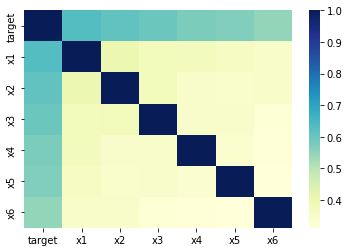

In [152]:
corrmat = num_df.corr(method='pearson')

# we can make a heatmap with the package seaborn
# # and customise the colours of searborn's heatmap

cmap = "YlGnBu"
# and now plot the correlation matrix

print(corrmat)

sns.heatmap(corrmat, cmap=cmap)
plt.show()
